[View in Colaboratory](https://colab.research.google.com/github/AlanCramer/Intro-to-Machine-Learning/blob/master/2_Hello_Logistic_Regression.ipynb)

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sklearn

What happens if our label is not continuous? For example, how does hours of studying impact whether a student passes a test? Or, 

**How long do students need to use our software to likely meet their lexile growth goals?**



In [0]:
numStudents = 10
students = np.arange(numStudents)


Let's say that each student studied between 0 and 8 hours.

Let's make data to show that if a student studies for 4 hours they have a 50% chance of passing. 

But then we will add "noise" to make it more realistic.

That is, we'll set it up so that some students don't even need to study for 4 hours, and they pass. And some students will study for more than 4 hours and still not pass.

In [4]:
def hoursStudied(s):
  return np.random.uniform(0, 8)

studyHours = np.array([hoursStudied(si) for si in students])
studyHours

array([5.21663562, 4.30728271, 5.66069332, 5.50566758, 1.68379733,
       0.44838707, 0.07464453, 5.91723938, 4.77511978, 7.90107349])

Now, did they pass or not? Let's use normalized distribution.

For each student, we'll select a number which is the hours they needed to study to pass. If they studied more than that they passed.

In [5]:
def hoursNeeded(s):
  return np.random.normal(4, 2)

needHours = np.array([hoursNeeded(si) for si in students])
needHours

array([2.13026101, 3.3234661 , 7.51766791, 0.775435  , 7.01453022,
       4.56157606, 3.71930662, 3.93864132, 7.68170187, 2.60008283])

In [6]:
def studentPassed(sid):
  return 1 if studyHours[sid] > needHours[sid] else 0

passedTest = np.array([studentPassed(si) for si in students])
passedTest

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

Okay, so here's our data:

In [7]:
print(studyHours)
print(passedTest)

[5.21663562 4.30728271 5.66069332 5.50566758 1.68379733 0.44838707
 0.07464453 5.91723938 4.77511978 7.90107349]
[1 1 0 1 0 0 0 1 0 1]


With this data, can we predict for a new student, how long they might need to study to pass?

In [8]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e8)

#print(studyHours)
#X = studyHours[:, np.newaxis]
X = studyHours.reshape(-1, 1)
#print (X)
clf.fit(X, passedTest)

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

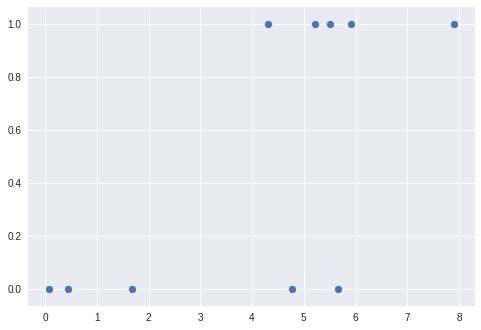

In [9]:
plt.scatter(studyHours, passedTest)
plt.show()

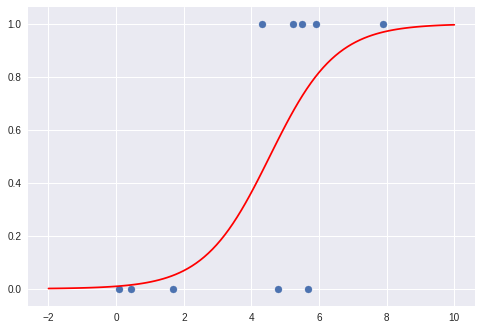

In [10]:
def model(x):
  return 1/(1 + np.exp(-x))

X_test = np.linspace(-2, 10, 100)
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, c='r')
plt.scatter(studyHours, passedTest)
plt.show()